In [1]:
import pandas as pd
import requests
import os

In [4]:
#first download the table csv file and put the path here
PATH = '/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI Patient Grid (3).csv'

In [5]:
data = pd.read_csv(PATH)
data

,Patient ID,Autonumber,Dentist Name,First Name,Last Name,Initial,Age,Age Group,Gender,Constant,...,Final Score Calculus,Bleeding,Total Tooth (from Bleeding),Total Score (from Bleeding),Final Score Bleeding,Tooth Wear,Total Tooth (from Tooth Wear),Total Score (from Tooth Wear),Final Score Tooth Wear,Final Score
0,1AG,1,28DT,Aaron,Giddings,AG,47,> 46,Male,2600,...,#ERROR!,"1AG,1AG","32, 28","4, 15",#ERROR!,"1AG,1AG","32, 32","31, 0",#ERROR!,#ERROR!
1,2AL,2,28DT,Arun,Lertsumitkul,AL,30,19-30,Male,1800,...,#ERROR!,"2AL,2AL,2AL","28, 32, 28","28, 32, 28",#ERROR!,"2AL,2AL","32, 28","32, 25",#ERROR!,#ERROR!
2,3AA,3,28DT,Abel,Alves,AA,58,> 46,Female,2600,...,2600,3AA,24,15,1625,3AA,24,24,2600,#ERROR!
3,4AJ,4,28DT,Ahmad,Johan,AJ,31,31-45,Male,2400,...,1286,4AJ,28,0,0,4AJ,28,28,2400,#ERROR!
4,5AN,5,28DT,Alicia,Nadia,AN,20,19-30,Female,1800,...,1704,NaN,NaN,NaN,NaN,5AN,27,27,1800,#ERROR!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,524R,524,18RD,Rifki,NaN,R,18,0-18,Male,1600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,525NF,525,18RD,Nada,Fajria,NF,11,0-18,Female,1600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,526LW,526,18RD,Lutfiyah Azzahra Wardatul Jannah,Wardatul Jannah,LW,11,0-18,Female,1600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,527I,527,18RD,Imam,NaN,I,28,19-30,Male,1800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['Patient ID', 'Autonumber', 'Dentist Name', 'First Name', 'Last Name',
       'Initial ', 'Age', 'Age Group', 'Gender', 'Constant', 'IO/EO Photos',
       'Informed Consent', 'Plaque', 'Total Tooth (from Plaque)',
       'Total Score (from Plaque)', 'Final Score Plaque', 'Caries',
       'Total Tooth (from Caries)', 'Total Score (from Caries)',
       'Final Score Caries', 'Calculus', 'Total Tooth (from Calculus)',
       'Total Score (from Calculus)', 'Final Score Calculus', 'Bleeding',
       'Total Tooth (from Bleeding)', 'Total Score (from Bleeding)',
       'Final Score Bleeding', 'Tooth Wear', 'Total Tooth (from Tooth Wear)',
       'Total Score (from Tooth Wear)', 'Final Score Tooth Wear',
       'Final Score'],
      dtype='object')

In [7]:
def download_image(image_url, save_path, log_file):
    # Check if the file is already logged as downloaded
    if os.path.exists(log_file):
        with open(log_file, 'r') as log:
            downloaded_files = log.read().splitlines()
            if save_path in downloaded_files:
                print(f'{save_path} is already recorded in the log. Skipping download.')
                return
    
    try:
        # Send a GET request to the image URL
        response = requests.get(image_url)
        
        # Check the response status code
        if response.status_code == 200:
            # Open a file in binary write mode
            with open(save_path, 'wb') as file:
                # Write the content of the response (the image) to the file
                file.write(response.content)
            print(f'Image successfully downloaded and saved as {save_path}')
            
            # Log the downloaded file
            with open(log_file, 'a') as log:
                log.write(save_path + '\n')
        elif response.status_code == 410:
            print(f'Failed to retrieve the image: {response.status_code} - The resource is permanently gone.')
        else:
            print(f'Failed to retrieve the image: {response.status_code} - {response.reason}')
    
    except requests.exceptions.RequestException as e:
        # Handle any other exceptions (network issues, invalid URL, etc.)
        print(f'An error occurred: {e}')

In [8]:
log_file = '/Users/khawaritzmi/GAIA_partime/Dental/programs/datasets/OHI_dataset/download_log.txt'
for patient_imgs in data['IO/EO Photos']:
    _splitted_data = patient_imgs.split(',')
    for single_img in _splitted_data:
        _path = single_img.split(' ')[-1]
        _path = _path[1:-1]

        img_name = single_img.split(' ')[0]

        save_path = f'/Users/khawaritzmi/GAIA_partime/Dental/programs/datasets/OHI_dataset{img_name}'
        download_image(_path, save_path, log_file)
        

Image successfully downloaded and saved as /Users/khawaritzmi/GAIA_partime/Dental/programs/datasets/OHI_datasetIMG_4504.JPG
Image successfully downloaded and saved as /Users/khawaritzmi/GAIA_partime/Dental/programs/datasets/OHI_datasetIMG_4503.JPG
Image successfully downloaded and saved as /Users/khawaritzmi/GAIA_partime/Dental/programs/datasets/OHI_datasetIMG_4505.JPG
Image successfully downloaded and saved as /Users/khawaritzmi/GAIA_partime/Dental/programs/datasets/OHI_datasetIMG_5288.JPG
Image successfully downloaded and saved as /Users/khawaritzmi/GAIA_partime/Dental/programs/datasets/OHI_datasetIMG_5285.JPG
Image successfully downloaded and saved as /Users/khawaritzmi/GAIA_partime/Dental/programs/datasets/OHI_datasetIMG_5287.JPG
Image successfully downloaded and saved as /Users/khawaritzmi/GAIA_partime/Dental/programs/datasets/OHI_datasetIMG_5020.JPG
Image successfully downloaded and saved as /Users/khawaritzmi/GAIA_partime/Dental/programs/datasets/OHI_datasetIMG_5021.JPG
Image su

In [1]:
sample_path = "/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI_airtable/_MG_3837.JPG"

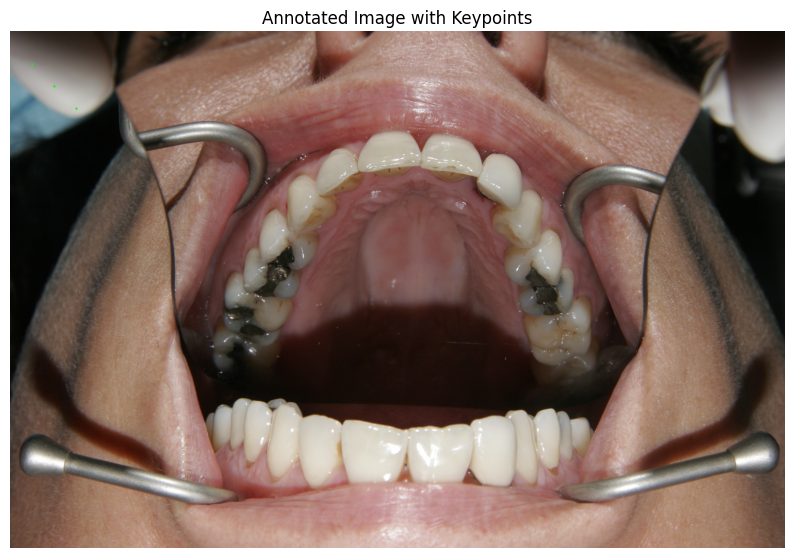

In [2]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the image
image_path = sample_path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image.")
    exit()

# Convert the image from BGR to RGB (since OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Define the keypoints
# Keypoints are (x, y) coordinates. Here are some example keypoints.
keypoints = [
    (100, 150),  # Keypoint 1
    (200, 250),  # Keypoint 2
    (300, 350)   # Keypoint 3
]

# Step 3: Draw the keypoints on the image
for point in keypoints:
    x, y = point
    # Draw a circle at each keypoint
    cv2.circle(image_rgb, (x, y), radius=5, color=(0, 255, 0), thickness=-1)  # Green circle with filled interior

# Step 4: Display the image with keypoints in the notebook
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title('Annotated Image with Keypoints')
plt.axis('off')  # Hide axes
plt.show()

In [14]:
import math

import cv2

ring = cv2.imread("./data/circle.png")
size = ring.shape[0]  # assumes square image

outer_radius = size // 1.8
inner_radius_factor = 0.7  # 0.70 measured empirically from image

# Unwarp ring
warped = cv2.warpPolar(ring, (size, int(size * math.pi)), (outer_radius, outer_radius), outer_radius, 0)
# Rotate 90 degrees
straightened = cv2.rotate(warped, cv2.ROTATE_90_COUNTERCLOCKWISE)
# Crop to ring only
cropped = straightened[: int(straightened.shape[0] * (1 - inner_radius_factor)), :]

cv2.imwrite("circle_straight.png", cropped)

True

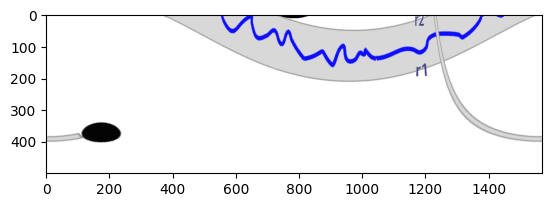

In [16]:
img1 = cv2.imread('./data/circle.png', 1)
polar_image = cv2.warpPolar(img1,dsize=(500,1570),center=(244, 248),maxRadius=250, flags=cv2.WARP_POLAR_LINEAR)
polar_image = cv2.rotate(polar_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(polar_image)